<a href="https://colab.research.google.com/github/sksaket/DataScience_R-code/blob/main/CRIME_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
df=pd.read_csv("/content/crime_data.csv")

In [ ]:
#Normalizing the function
def norm_func(i):
    x=(i-i.mean()/i.std())
    return x

df_norm=norm_func(df.iloc[:,1:])



{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b'],
 'dcoord': [[0.0, 38.5279119600323, 38.5279119600323, 0.0],
  [0.0, 15.4544491975612, 15.4544491975612, 0.0],
  [0.0, 16.976748805351395, 16.976748805351395, 15.4544491975612],
  [0.0, 21.16719159454083, 21.16719159454083, 0.0],
  [0.0, 28.63511829903973, 28.63511829903973, 21.16719159454083],
  [16.976748805351395,
   48.72514751132107,
   48.72514751132107,
   28.63511829903973],
  [0.0, 13.896042602122375, 13.896042602122375, 0.0],
  [0.0, 15.890248582070704, 15.890248582070704, 13.896042602122375],
  [0.0, 6.23698645180507, 6.23698645180507, 0.0],
  [0.0, 13.297368160654948, 13.297368160654948, 0.0],
  [6.23698645180507,
   22.366

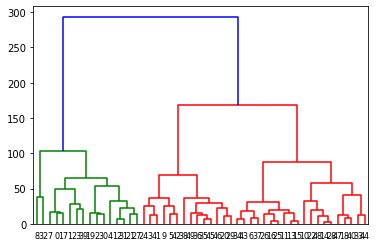

In [ ]:
#creating the dendogram
z=linkage(df_norm,method="complete", metric="euclidean")
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=8.,)

In [ ]:
#Defining the clusters
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete").fit(df_norm)
clusters_labels=pd.Series(model.labels_)
df["Clusters"]=clusters_labels
df=df.iloc[:,[5,0,1,2,3,4]]
df.iloc[:,2:].groupby(df.Clusters).median()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,3.55,94.0,59.5,14.55
1,11.35,257.0,71.0,26.95
2,7.65,167.5,69.0,23.10
3,14.20,336.0,62.5,24.00


In [ ]:
#importing to csv
df.to_csv("crime.csv",encoding="utf-8")